In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

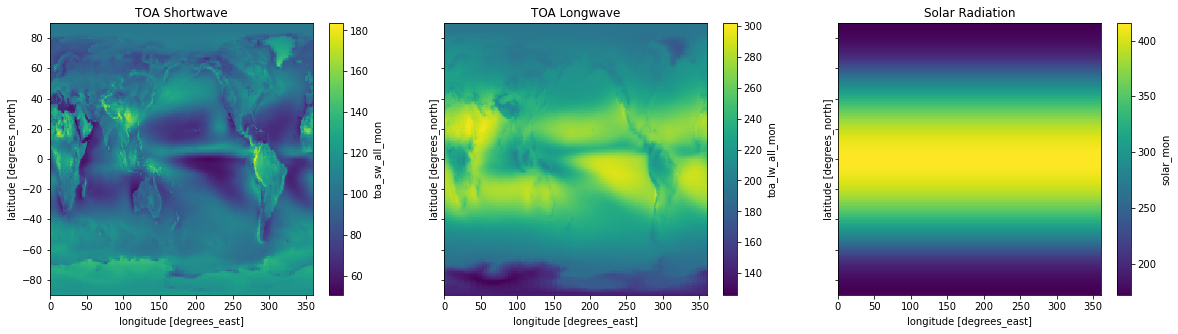

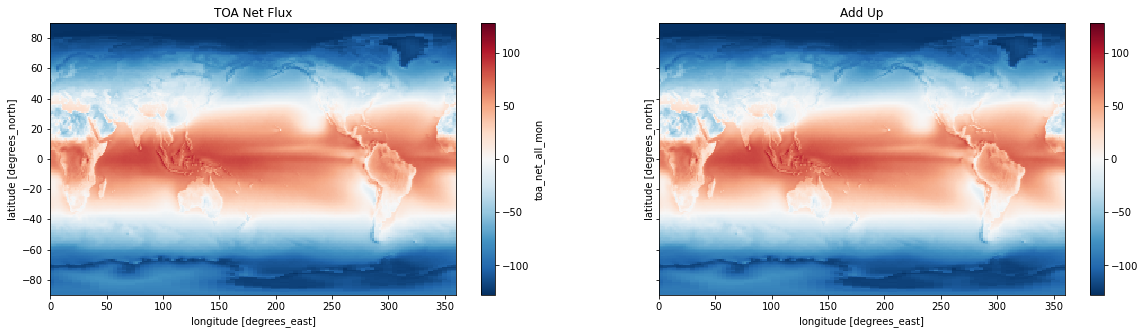

In [3]:
#2.1
#plot
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5),sharey=True)
ds.toa_sw_all_mon.mean(dim=['time']).plot(ax=ax1)
ds.toa_lw_all_mon.mean(dim=['time']).plot(ax=ax2)
ds.solar_mon.mean(dim=['time']).plot(ax=ax3)
ax1.set_title('TOA Shortwave'); ax2.set_title('TOA Longwave'); ax3.set_title('Solar Radiation')

#Add up calculate
net_cal=-ds.toa_sw_all_mon.mean(dim=['time'])-ds.toa_lw_all_mon.mean(dim=['time'])+ds.solar_mon
#Plot
fig,(ax4,ax5) = plt.subplots(1,2, figsize=(20,5),sharey=True)
ds.toa_net_all_mon.mean(dim=['time']).plot(ax=ax4)
net_cal.mean(dim=['time']).plot(ax=ax5)
ax4.set_title('TOA Net Flux'); ax5.set_title('Add Up');


In [4]:
#2.2
weights = np.cos(np.deg2rad(ds.lat))
weights

solar_mon_weighted= ds.solar_mon.weighted(weights)
incoming_solar=solar_mon_weighted.mean(dim=('lon', 'lat')).sum()/203

toa_sw_all_mon_weighted= ds.toa_sw_all_mon.weighted(weights)
outgoing_longwave=toa_sw_all_mon_weighted.mean(dim=('lon', 'lat')).sum()/203

toa_lw_all_mon_weighted= ds.toa_lw_all_mon.weighted(weights)
outgoing_shortwave=toa_lw_all_mon_weighted.mean(dim=('lon', 'lat')).sum()/203

incoming_solar,outgoing_longwave,outgoing_shortwave



(<xarray.DataArray 'solar_mon' ()>
 array(340.28348214),
 <xarray.DataArray 'toa_sw_all_mon' ()>
 array(99.13856604),
 <xarray.DataArray 'toa_lw_all_mon' ()>
 array(240.26681804))

Text(0, 0.5, 'TOA Net Flux[m W-2]')

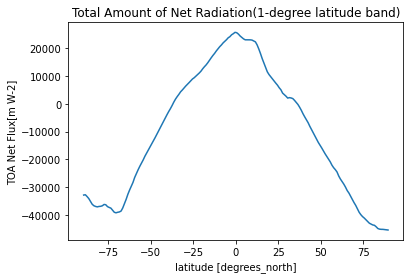

In [5]:
#2.3
ds.toa_net_all_mon.mean(dim=['time']).sum(dim=['lon']).plot()
plt.title('Total Amount of Net Radiation(1-degree latitude band)')
plt.ylabel('TOA Net Flux[m W-2]')


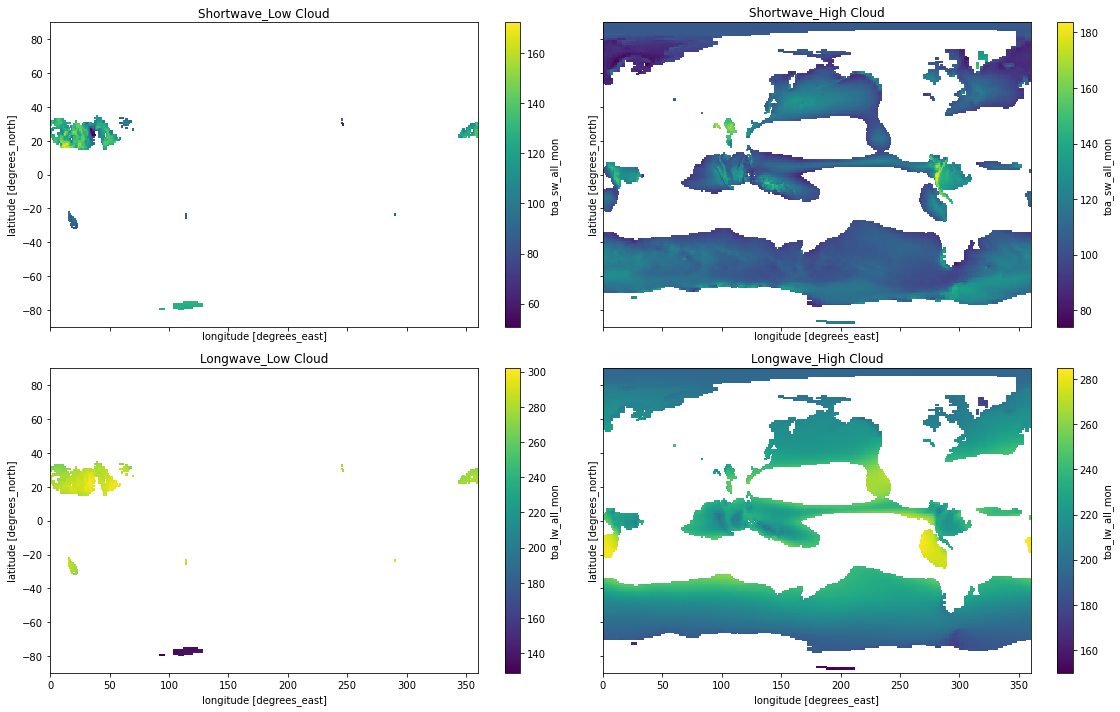

In [6]:
#2.4
arr=ds.cldarea_total_daynight_mon.mean(dim='time')

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,10),sharex=True,sharey=True)

ds.toa_sw_all_mon.mean(dim='time').where(~np.isnan(arr.where(arr<=25).values)).plot(ax=ax1)
ds.toa_sw_all_mon.mean(dim='time').where(~np.isnan(arr.where(arr>=75).values)).plot(ax=ax2)
ds.toa_lw_all_mon.mean(dim='time').where(~np.isnan(arr.where(arr<=25).values)).plot(ax=ax3)
ds.toa_lw_all_mon.mean(dim='time').where(~np.isnan(arr.where(arr>=75).values)).plot(ax=ax4)

ax1.set_title('Shortwave_Low Cloud',); ax2.set_title('Shortwave_High Cloud'); 
ax3.set_title('Longwave_Low Cloud');ax4.set_title('Longwave_High Cloud'); 

plt.tight_layout()


In [7]:
#2.5
lc_sw=ds.toa_sw_all_mon.mean(dim='time').where(~np.isnan(arr.where(arr<=25).values)).mean(dim=['lat','lon'])

hc_sw=ds.toa_sw_all_mon.mean(dim='time').where(~np.isnan(arr.where(arr>=75).values)).mean(dim=['lat','lon'])

lc_lw=ds.toa_lw_all_mon.mean(dim='time').where(~np.isnan(arr.where(arr<=25).values)).mean(dim=['lat','lon'])

hc_lw=ds.toa_lw_all_mon.mean(dim='time').where(~np.isnan(arr.where(arr>=75).values)).mean(dim=['lat','lon'])

lc_sw,hc_sw,lc_lw,hc_lw


(<xarray.DataArray 'toa_sw_all_mon' ()>
 array(122.65546, dtype=float32),
 <xarray.DataArray 'toa_sw_all_mon' ()>
 array(108.09777, dtype=float32),
 <xarray.DataArray 'toa_lw_all_mon' ()>
 array(270.10367, dtype=float32),
 <xarray.DataArray 'toa_lw_all_mon' ()>
 array(216.55675, dtype=float32))